<a href="https://colab.research.google.com/github/pranit06/Deep_Learning/blob/main/J048_DL_Lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Packages

In [ ]:
import pandas as pd
import numpy as np
import os 
import zipfile 
import matplotlib.pyplot as plt

import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers, Model, models

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import ResNet50

## Getting Data

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-03-19 07:32:21--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.20.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   150MB/s    in 0.4s    

2021-03-19 07:32:21 (150 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

### Visualizing The Data

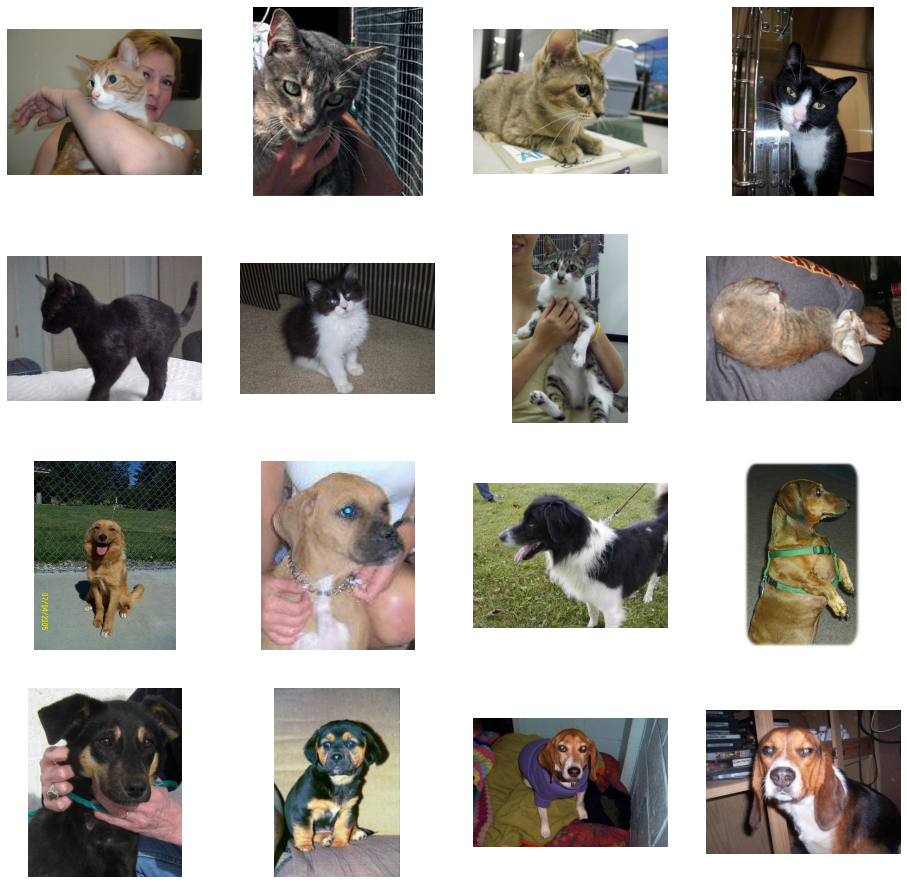

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
import matplotlib.image as mpimg
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 100
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )


next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

### Performing Data Augmentation To Increase Our Dataset

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, 
                                   height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, 
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

## VGG16

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', 
                                                    target_size = (224, 224))

validation_generator = test_datagen.flow_from_directory( validation_dir,  batch_size = 20, class_mode = 'binary', 
                                                        target_size = (224, 224))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Defining The Base Model

In [ ]:
base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
                   include_top = False, # Leave out the last fully connected layer
                   weights = 'imagenet') # Using The Imagenet weights

for layer in base_model.layers:
    layer.trainable = False

58892288/58889256 [==============================] - 1s 0us/step


### Defining The Final Layers of Our Model

In [ ]:
# Flattening Layer
x = layers.Flatten()(base_model.output)

# Fully Connected Layer 1
x = layers.Dense(512, activation = 'relu')(x)
x = layers.Dropout(0.5)(x)

# Output Layer 
x = layers.Dense(1, activation = 'sigmoid')(x)

# Adding The Final Layer and Compiling It
model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = 0.0001), loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
vgghist = model.fit(train_generator, validation_data = validation_generator, 
                    steps_per_epoch = 100, epochs = 10)

Epoch 1/10
100/100 [==============================] - 69s 324ms/step - loss: 0.9712 - accuracy: 0.5802 - val_loss: 0.6877 - val_accuracy: 0.6860
Epoch 2/10
100/100 [==============================] - 32s 322ms/step - loss: 0.5148 - accuracy: 0.7532 - val_loss: 0.3031 - val_accuracy: 0.8610
Epoch 3/10
100/100 [==============================] - 32s 322ms/step - loss: 0.4087 - accuracy: 0.8116 - val_loss: 0.3217 - val_accuracy: 0.8520
Epoch 4/10
100/100 [==============================] - 32s 320ms/step - loss: 0.4322 - accuracy: 0.7849 - val_loss: 0.2419 - val_accuracy: 0.8930
Epoch 5/10
100/100 [==============================] - 32s 324ms/step - loss: 0.3618 - accuracy: 0.8450 - val_loss: 0.2221 - val_accuracy: 0.9120
Epoch 6/10
100/100 [==============================] - 32s 323ms/step - loss: 0.3127 - accuracy: 0.8666 - val_loss: 0.1981 - val_accuracy: 0.9230
Epoch 7/10
100/100 [==============================] - 32s 324ms/step - loss: 0.3503 - accuracy: 0.8462 - val_loss: 0.3403 - val_ac

## Inception

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', 
                                                    target_size = (150, 150))

validation_generator = test_datagen.flow_from_directory(validation_dir,  batch_size = 20, class_mode = 'binary', 
                                                        target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Defining The Base Model

In [ ]:
base_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, 
                         weights = 'imagenet') # Including Imagenet Weights For the Model
for layer in base_model.layers:
    layer.trainable = False

### Defining The Final Layers Of Our Model

In [ ]:
# Flattening Layer
x = layers.Flatten()(base_model.output)

# Fully Connected Layer 1
x = layers.Dense(1024, activation = 'relu')(x)
x = layers.Dropout(0.2)(x)

# Output Layer 
x = layers.Dense(1, activation = 'sigmoid')(x)

# Adding The Final Layer and Compiling It
model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = 0.0001), loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
inc_history = model.fit(train_generator, validation_data = validation_generator, 
                        steps_per_epoch = 100, epochs = 10)

Epoch 1/10
100/100 [==============================] - 24s 199ms/step - loss: 2.4844 - accuracy: 0.7793 - val_loss: 0.1506 - val_accuracy: 0.9490
Epoch 2/10
100/100 [==============================] - 19s 186ms/step - loss: 0.4372 - accuracy: 0.8946 - val_loss: 0.2795 - val_accuracy: 0.9370
Epoch 3/10
100/100 [==============================] - 19s 187ms/step - loss: 0.3917 - accuracy: 0.8951 - val_loss: 0.1537 - val_accuracy: 0.9550
Epoch 4/10
100/100 [==============================] - 19s 186ms/step - loss: 0.3044 - accuracy: 0.9114 - val_loss: 0.6475 - val_accuracy: 0.8780
Epoch 5/10
100/100 [==============================] - 19s 186ms/step - loss: 0.3282 - accuracy: 0.9016 - val_loss: 0.3459 - val_accuracy: 0.9310
Epoch 6/10
100/100 [==============================] - 19s 185ms/step - loss: 0.3921 - accuracy: 0.9030 - val_loss: 0.2701 - val_accuracy: 0.9370
Epoch 7/10
100/100 [==============================] - 19s 185ms/step - loss: 0.2853 - accuracy: 0.9245 - val_loss: 0.4102 - val_ac

## ResNet50

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', 
                                                    target_size = (224, 224))

validation_generator = test_datagen.flow_from_directory( validation_dir, batch_size = 20, class_mode = 'binary', 
                                                        target_size = (224, 224))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Defining The Base Model

In [ ]:
base_model = ResNet50(input_shape=(224, 224,3), include_top = False,
                      weights = "imagenet") # Including Imagenet weights
for layer in base_model.layers:
    layer.trainable = False

94773248/94765736 [==============================] - 1s 0us/step


### Defining The Final Layers of Our Model

In [ ]:
# Defining a Sequential Model
base_model = models.Sequential()

# Adding The ResNet50 Model
base_model.add(ResNet50(include_top = False, weights = 'imagenet', pooling = 'max'))

# Adding The Final Layer and Compiling It
base_model.add(layers.Dense(1, activation = 'sigmoid'))
base_model.compile(optimizer = tf.keras.optimizers.SGD(lr = 0.0001), loss = 'binary_crossentropy', 
                   metrics = ['accuracy'])

In [ ]:
resnet_history = base_model.fit(train_generator, validation_data = validation_generator, 
                                steps_per_epoch = 100, epochs = 10)

Epoch 1/10
100/100 [==============================] - 43s 376ms/step - loss: 2.2556 - accuracy: 0.6406 - val_loss: 0.8136 - val_accuracy: 0.5100
Epoch 2/10
100/100 [==============================] - 37s 368ms/step - loss: 0.5320 - accuracy: 0.8428 - val_loss: 3.3977 - val_accuracy: 0.4990
Epoch 3/10
100/100 [==============================] - 37s 369ms/step - loss: 0.4521 - accuracy: 0.8880 - val_loss: 2.0774 - val_accuracy: 0.5090
Epoch 4/10
100/100 [==============================] - 37s 367ms/step - loss: 0.3766 - accuracy: 0.9076 - val_loss: 2.3604 - val_accuracy: 0.5140
Epoch 5/10
100/100 [==============================] - 37s 367ms/step - loss: 0.3019 - accuracy: 0.9249 - val_loss: 2.0946 - val_accuracy: 0.5280
Epoch 6/10
100/100 [==============================] - 37s 366ms/step - loss: 0.3062 - accuracy: 0.9142 - val_loss: 1.5182 - val_accuracy: 0.6440
Epoch 7/10
100/100 [==============================] - 36s 364ms/step - loss: 0.2828 - accuracy: 0.9138 - val_loss: 0.7071 - val_ac

## Final Analysis

| Model        | No. of Parameters | Test Accuracy |
|--------------|-------------------|---------------|
| VGG16        | 138 Million       | 92.7 %        |
| Inception V3 | 25 Million        | 96.2 %        |
| ResNet50     | 24 Million        | 94.5 %        |